In [16]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def iterate_map(f, x_0, n):
    # extended for multi-dim case
    # trajectory = [x_0] * (n+1)
    trajectory = np.stack([x_0] * (n+1), axis=0)
    trajectory[0] = x_0
    for i in range(1, n + 1):
        # should probably just pass in vector instead of unpacking
        trajectory[i] = f(*trajectory[i-1]) 
    
    return trajectory

henon = lambda a, b: lambda x, y: np.asarray((a - (x**2) + b * y, x))
henon_inv = lambda a, b: lambda x, y: np.asarray((y, (x + y**2 - a) / b))

In [17]:
# def problem_1():
#     trapezoid = 
def make_polygon(corners, total_pts):
    pts_per_side = total_pts // len(corners)
    points = np.array([]).reshape(0, 2)
    
    for i in range(len(corners)):
        (x_start, y_start) = corners[i]
        (x_end, y_end) = corners[(i+1) % len(corners)]
        
        side_points = np.array([np.linspace(x_start, x_end, pts_per_side), 
         np.linspace(y_start, y_end, pts_per_side)]).T
        
#         np.linspace(x_start, x_end, pts_per_side)
#         np.interp(,  [x_start, x_end], [y_start, y_end])
        points = np.concatenate((points, side_points), axis=0)
    
    return points

In [18]:
def recur(fn, x_in, y_in, remaining):
    if remaining == 0:
        return (x_in, y_in)
    else:
        (x_out, y_out) = fn(x_in, y_in)
        return recur(fn, x_out, y_out, remaining - 1)

def problem_1():
    a = 4
    b = 0.2
    
    fig1, ax1 = plt.subplots(figsize=(16, 16))
    fig2, ax2 = plt.subplots(figsize=(16, 16))
    
    ax1.set_aspect('equal')
    ax1.set_ylim(-6, 6)
    ax1.set_xlim(-6, 6)
    
    ax2.set_aspect('equal')
    ax2.set_ylim(-6, 6)
    ax2.set_xlim(-6, 6)
    
    trapezoid = make_polygon([[-3, -3], [3, -1.5], [3, 1.5], [-3, 3]], 10**6)
    trapezoid_x = trapezoid[:,0].flatten()
    trapezoid_y = trapezoid[:,1].flatten()
    dist = trapezoid_x + trapezoid_y
    
    # Plot trapezoid, f1 and f1_inv
    ax1.scatter(trapezoid_x, trapezoid_y, c=dist, s=0.1, cmap=plt.get_cmap('cool'))
    
    trapezoid_f1 = henon(a, b)(trapezoid_x, trapezoid_y)
    ax1.scatter(trapezoid_f1[0], trapezoid_f1[1], c=dist, s=0.1, cmap=plt.get_cmap('cool'))
    
    trapezoid_f1_inv = henon_inv(a, b)(trapezoid_x, trapezoid_y)
    ax1.scatter(trapezoid_f1_inv[0], trapezoid_f1_inv[1], c=dist, s=0.1, cmap=plt.get_cmap('cool'))
    
    # Plot trapezoid, f4 and f4_inv
    ax2.scatter(trapezoid_x, trapezoid_y, c=dist, s=0.1, cmap=plt.get_cmap('cool'))
    
    henon4 = lambda a, b: lambda x, y: recur(henon(a, b), x, y, 4)
    henon4_inv = lambda a, b: lambda x, y: recur(henon_inv(a, b), x, y, 4)
    
    trapezoid_f4 = henon4(a, b)(trapezoid_x, trapezoid_y)
    trapezoid_f4_inv = henon4_inv(a, b)(trapezoid_x, trapezoid_y)
    
    ax2.scatter(trapezoid_f4[0], trapezoid_f4[1], s=0.1, color="red")
    ax2.scatter(trapezoid_f4_inv[0], trapezoid_f4_inv[1], s=0.1, color="green")

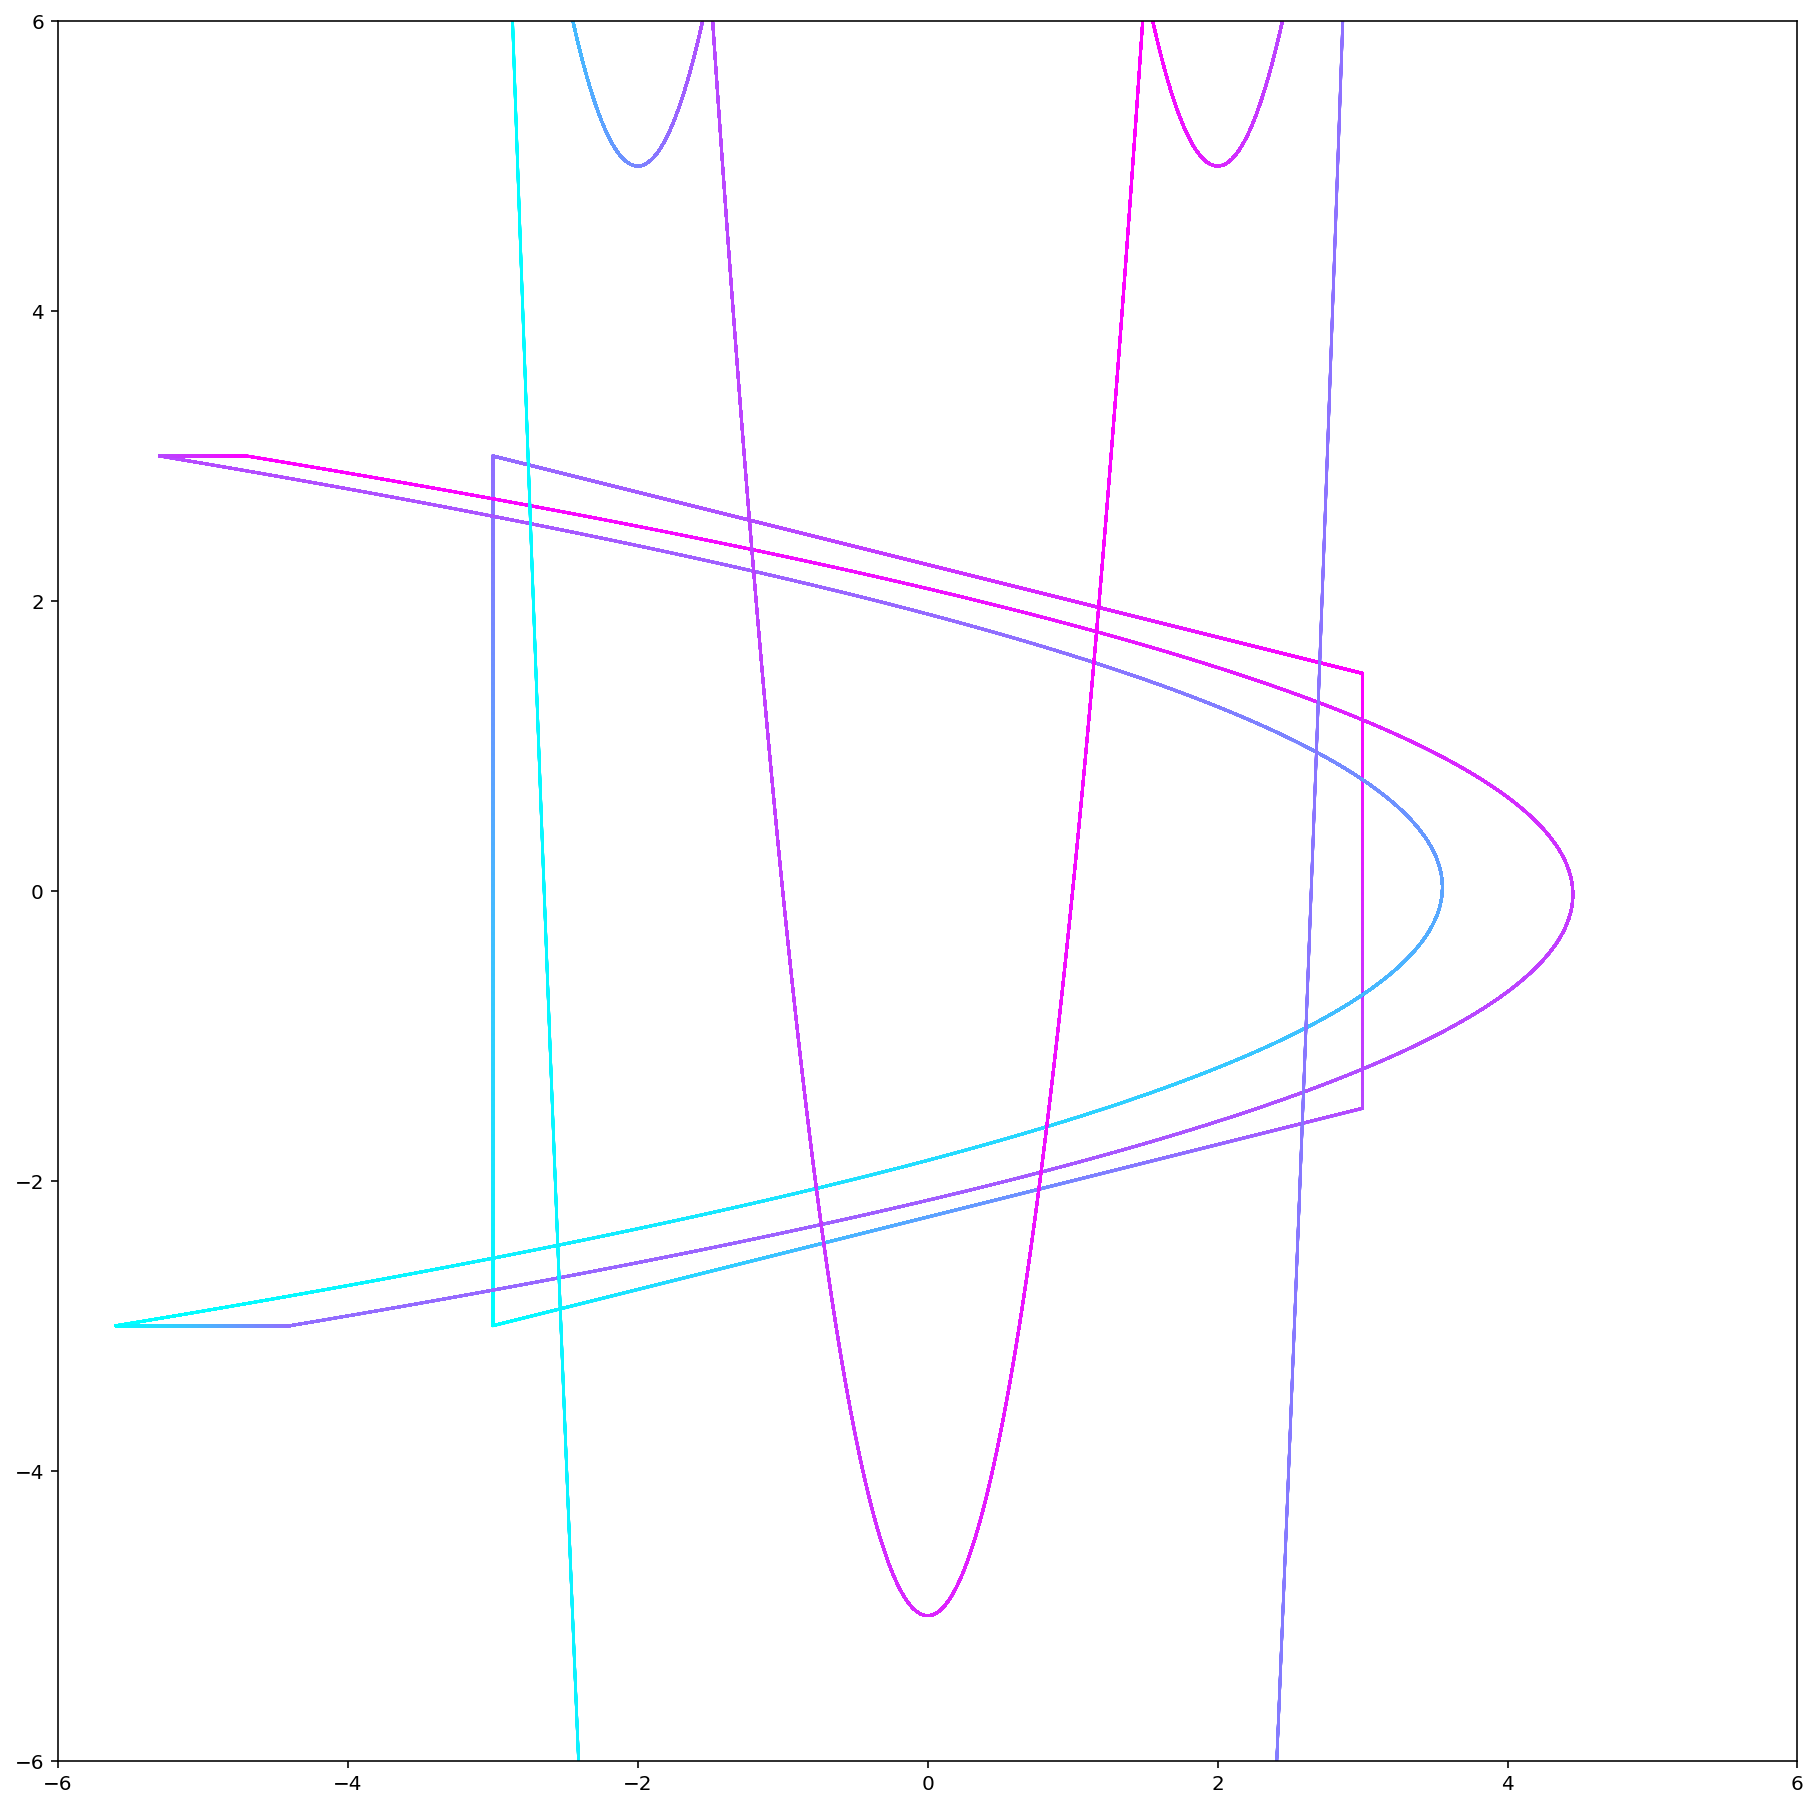

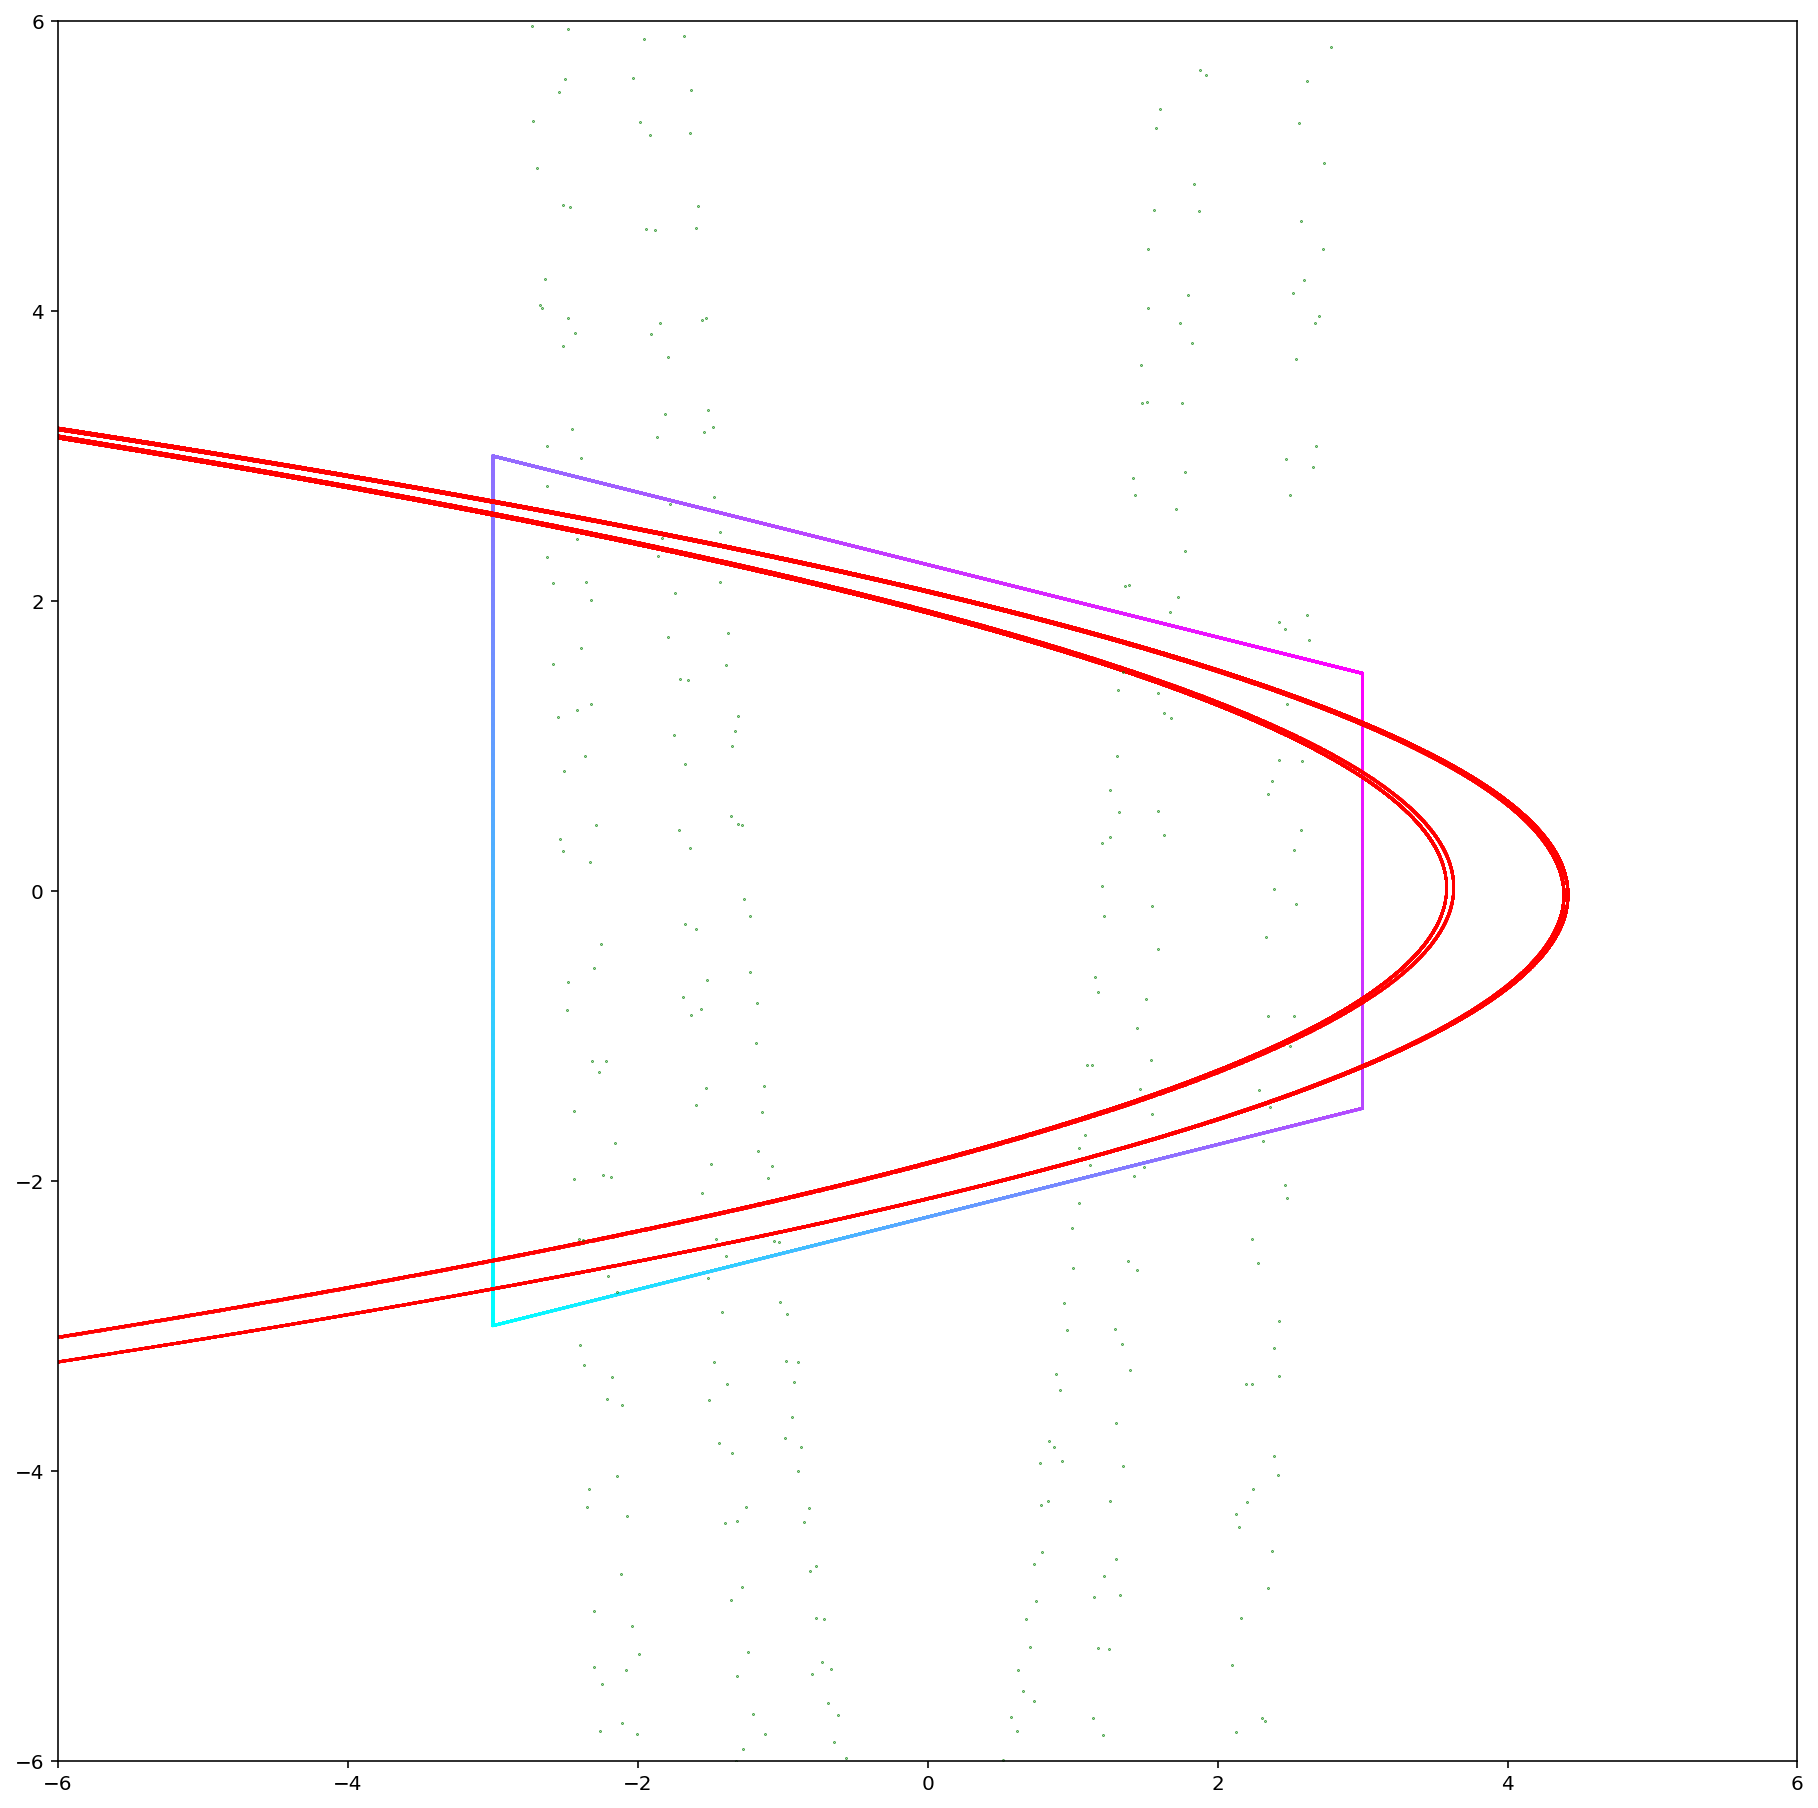

In [19]:
problem_1()

In [179]:
import functools

def make_polygon_col(corners, total_pts):
    pts_per_side = total_pts // len(corners)
    points = np.array([]).reshape(2, 0)
    
    for i in range(len(corners)):
        (x_start, y_start) = corners[i]
        (x_end, y_end) = corners[(i+1) % len(corners)]
        
        side_points = np.array([np.linspace(x_start, x_end, pts_per_side), 
                                np.linspace(y_start, y_end, pts_per_side)])
    
        points = np.concatenate((points, side_points), axis=1)
    
    return points

def make_ifs(fns, probabilities=[]):
    # create prob thresholds
    if not probabilities:
        probabilities = [1/len(fns)] * len(fns)
    thresholds = functools.reduce(lambda l, el: l + [l[-1] + el], probabilities, [0])[1:]
    
    def apply_ifs(x): # let x be a vector
        random = np.random.random()
        for i in range(len(thresholds)):
            if random < thresholds[i]:
                return fns[i](x)
        else:
            return fns[len(fns) - 1](x)
        
    return apply_ifs
        

def iterate_map(f, x_0, n):
    # extended for multi-dim case
    # trajectory = [x_0] * (n+1)
    trajectory = np.stack([x_0] * (n+1), axis=0)
    trajectory[0] = x_0
    for i in range(1, n + 1):
        # takes in vector instead of params
        trajectory[i] = f(trajectory[i-1]) 
    
    return trajectory
    
    
def problem_2():
    
    square_x, square_y = make_polygon_col([[0, 0], [0, 1], [1, 1], [1, 0]], 10**4)
    square = [square_x, square_y]

    f1 = lambda x: np.array((x[0]/2, x[1]/2))
    f2 = lambda x: np.array((x[0]/2 + 1/4, x[1]/2 + 1/2))
    f3 = lambda x: np.array((x[0]/2 + 1/2, x[1]/2))
    
    ifs = make_ifs([f1, f2, f3])
    trajectory = iterate_map(ifs, [0.5, 0.5], 10**5)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')
    
    square_f1 = np.apply_along_axis(f1, 0, square)
    square_f2 = np.apply_along_axis(f2, 0, square)
    square_f3 = np.apply_along_axis(f3, 0, square)
    
    ax.scatter(square_x, square_y, s=1)
    ax.scatter(square_f1[0], square_f1[1], s=1)
    ax.scatter(square_f2[0], square_f2[1], s=1)
    ax.scatter(square_f3[0], square_f3[1], s=1)
    ax.scatter(trajectory[:,0].flatten(), trajectory[:,1].flatten(), s=1)

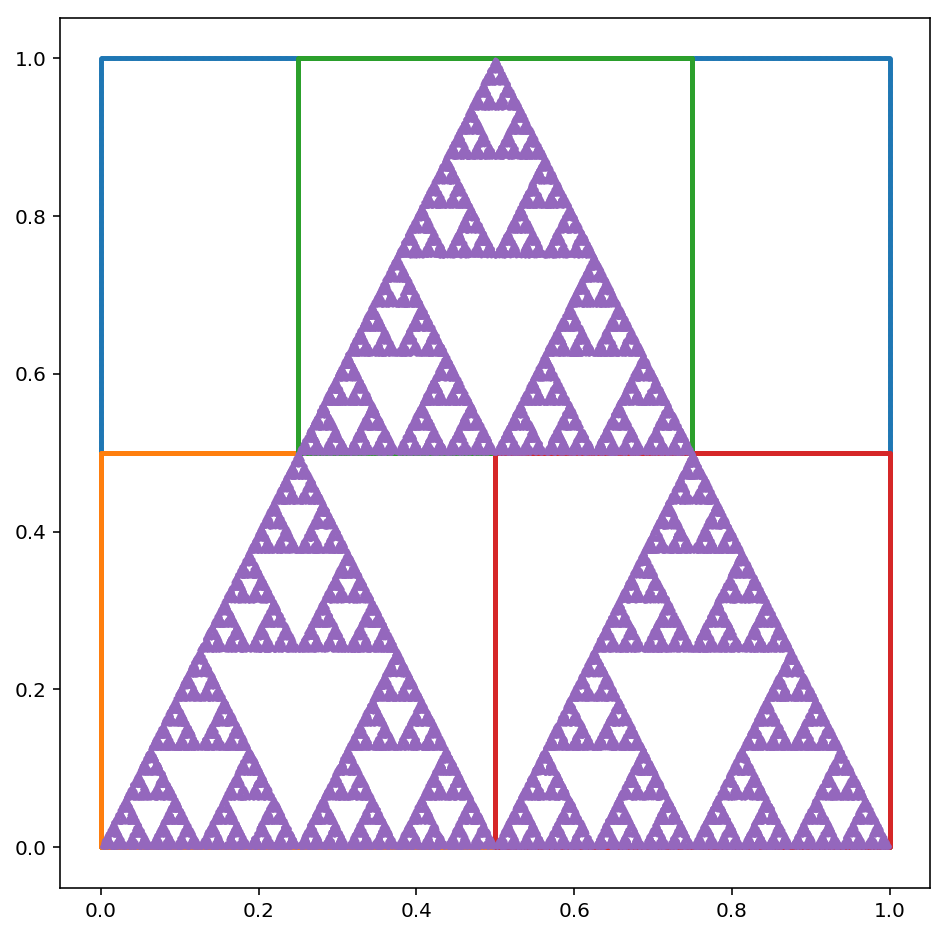

In [180]:
problem_2()

In [178]:
# np.apply_along_axis(lambda line: print(line), 0, [[1, 2, 3], [4, 5, 6]])
# np.apply_along_axis(lambda line: print(line), 1, [[1, 2, 3], [4, 5, 6]])

[1 4]
[2 5]
[3 6]
[1 2 3]
[4 5 6]


array([None, None], dtype=object)